# Split Data

In [76]:
import numpy as np
import pandas as pd
import copy as cp
import matplotlib.pyplot as plt

In [55]:
%matplotlib notebook

In [56]:
df0 = pd.read_csv("data.csv")
df0.shape

(2703, 18)

In [57]:
df0.head()

,Year,Sex,Age,Race and Hispanic Origin,State,Deaths,Population,Crude Death Rate,Standard Error for Crude Rate,Low Confidence Limit for Crude Rate,Upper Confidence Limit for Crude Rate,Age-adjusted Rate,Standard Error Age-adjusted Rate,Lower Confidence Limit for Age-adjusted rate,Upper Confidence Limit for Age-adjusted Rate,State Crude Rate in Range,US Crude Rate,US Age-adjusted Rate
0,2014,Both Sexes,15-24 years,All Races-All Origins,United States,3798,43979821,8.6,0.1,8.4,8.9,NaN,NaN,NaN,NaN,NaN,14.8,14.7
1,2012,Male,15-24 years,Non-Hispanic White,United States,2137,12857283,16.6,0.4,15.9,17.3,NaN,NaN,NaN,NaN,NaN,13.2,13.1
2,2008,Male,Less than 15 years,Non-Hispanic Black,United States,15,4687984,0.3,0.1,0.2,0.5,NaN,NaN,NaN,NaN,NaN,12.0,11.9
3,2003,Both Sexes,35-44 years,Non-Hispanic White,United States,6533,30270056,21.6,0.3,21.1,22.1,NaN,NaN,NaN,NaN,NaN,8.9,8.9
4,2010,Female,Less than 15 years,Non-Hispanic White,United States,28,16460571,0.2,0.0,0.1,0.2,NaN,NaN,NaN,NaN,NaN,12.4,12.3


In [58]:
df1 = df0.drop(['Age-adjusted Rate',
                'Standard Error Age-adjusted Rate',
                'Lower Confidence Limit for Age-adjusted rate',
                'Upper Confidence Limit for Age-adjusted Rate',
                'State Crude Rate in Range',
                'US Age-adjusted Rate'], axis=1)
df1.head()

,Year,Sex,Age,Race and Hispanic Origin,State,Deaths,Population,Crude Death Rate,Standard Error for Crude Rate,Low Confidence Limit for Crude Rate,Upper Confidence Limit for Crude Rate,US Crude Rate
0,2014,Both Sexes,15-24 years,All Races-All Origins,United States,3798,43979821,8.6,0.1,8.4,8.9,14.8
1,2012,Male,15-24 years,Non-Hispanic White,United States,2137,12857283,16.6,0.4,15.9,17.3,13.2
2,2008,Male,Less than 15 years,Non-Hispanic Black,United States,15,4687984,0.3,0.1,0.2,0.5,12.0
3,2003,Both Sexes,35-44 years,Non-Hispanic White,United States,6533,30270056,21.6,0.3,21.1,22.1,8.9
4,2010,Female,Less than 15 years,Non-Hispanic White,United States,28,16460571,0.2,0.0,0.1,0.2,12.4


In [59]:
df2 = df1.drop(['Crude Death Rate',
                'Standard Error for Crude Rate',
                'Low Confidence Limit for Crude Rate',
                'Upper Confidence Limit for Crude Rate', 
                'US Crude Rate'], axis=1)
df2.head()

,Year,Sex,Age,Race and Hispanic Origin,State,Deaths,Population
0,2014,Both Sexes,15-24 years,All Races-All Origins,United States,3798,43979821
1,2012,Male,15-24 years,Non-Hispanic White,United States,2137,12857283
2,2008,Male,Less than 15 years,Non-Hispanic Black,United States,15,4687984
3,2003,Both Sexes,35-44 years,Non-Hispanic White,United States,6533,30270056
4,2010,Female,Less than 15 years,Non-Hispanic White,United States,28,16460571


In [60]:
df = cp.deepcopy(df2)
df['Rate'] = 100000 * df['Deaths'] / df['Population']

df.head()

,Year,Sex,Age,Race and Hispanic Origin,State,Deaths,Population,Rate
0,2014,Both Sexes,15-24 years,All Races-All Origins,United States,3798,43979821,8.635779
1,2012,Male,15-24 years,Non-Hispanic White,United States,2137,12857283,16.620930
2,2008,Male,Less than 15 years,Non-Hispanic Black,United States,15,4687984,0.319967
3,2003,Both Sexes,35-44 years,Non-Hispanic White,United States,6533,30270056,21.582385
4,2010,Female,Less than 15 years,Non-Hispanic White,United States,28,16460571,0.170103


In [61]:
years = df['Year'].unique()
years = sorted(years)

yrDFs = []
for year in years:
    yrDFs.append(df.loc[df['Year'] == year])

lsYRs = []
for aDF in yrDFs:
    lsYRs.append(aDF['Year'].unique()[0])
    
print(lsYRs)

[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [62]:
len(yrDFs)

17

In [63]:
17*159

2703

In [64]:
yrDFs[2].head()

,Year,Sex,Age,Race and Hispanic Origin,State,Deaths,Population,Rate
5,2001,Both Sexes,45-54 years,Non-Hispanic White,United States,3850,29733531,12.948344
9,2001,Male,55-64 years,Non-Hispanic Black,United States,129,1100021,11.727049
15,2001,Both Sexes,75+ years,Non-Hispanic White,United States,418,14549012,2.873047
50,2001,Female,75+ years,All Races-All Origins,United States,295,10641163,2.772253
55,2001,Both Sexes,Less than 15 years,Non-Hispanic Black,United States,24,9438333,0.254282


<IPython.core.display.Javascript object>


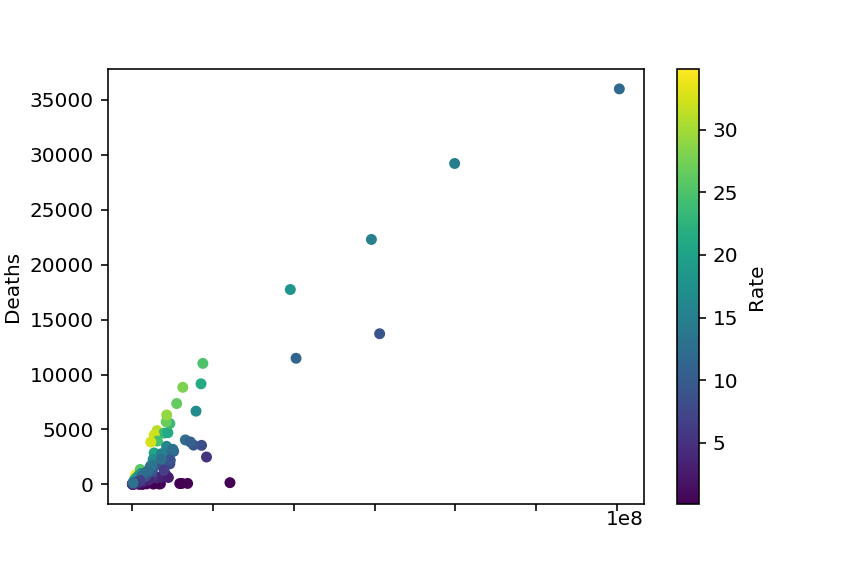

In [73]:
yrDFs[8].plot.scatter(x='Population', y='Deaths', c='Rate', colormap='viridis')

<IPython.core.display.Javascript object>


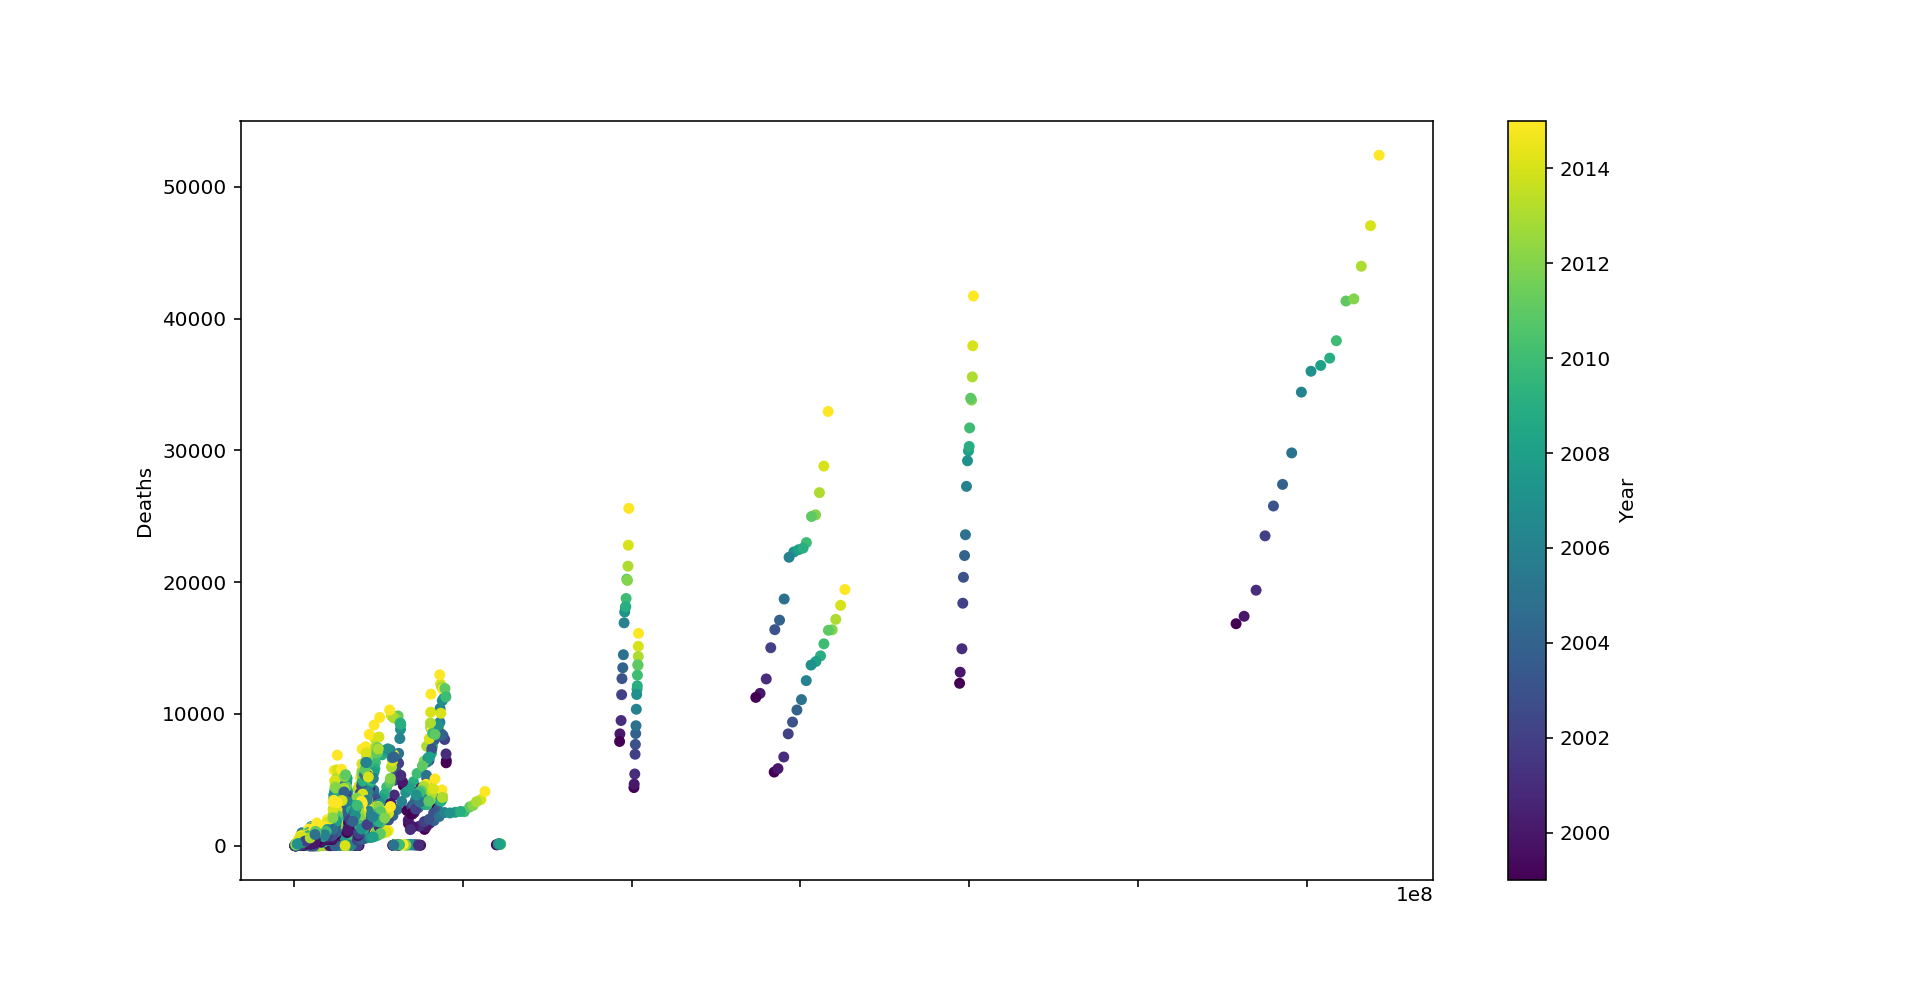

In [74]:
df.plot.scatter(x='Population', y='Deaths', c='Year', colormap='viridis')

<IPython.core.display.Javascript object>


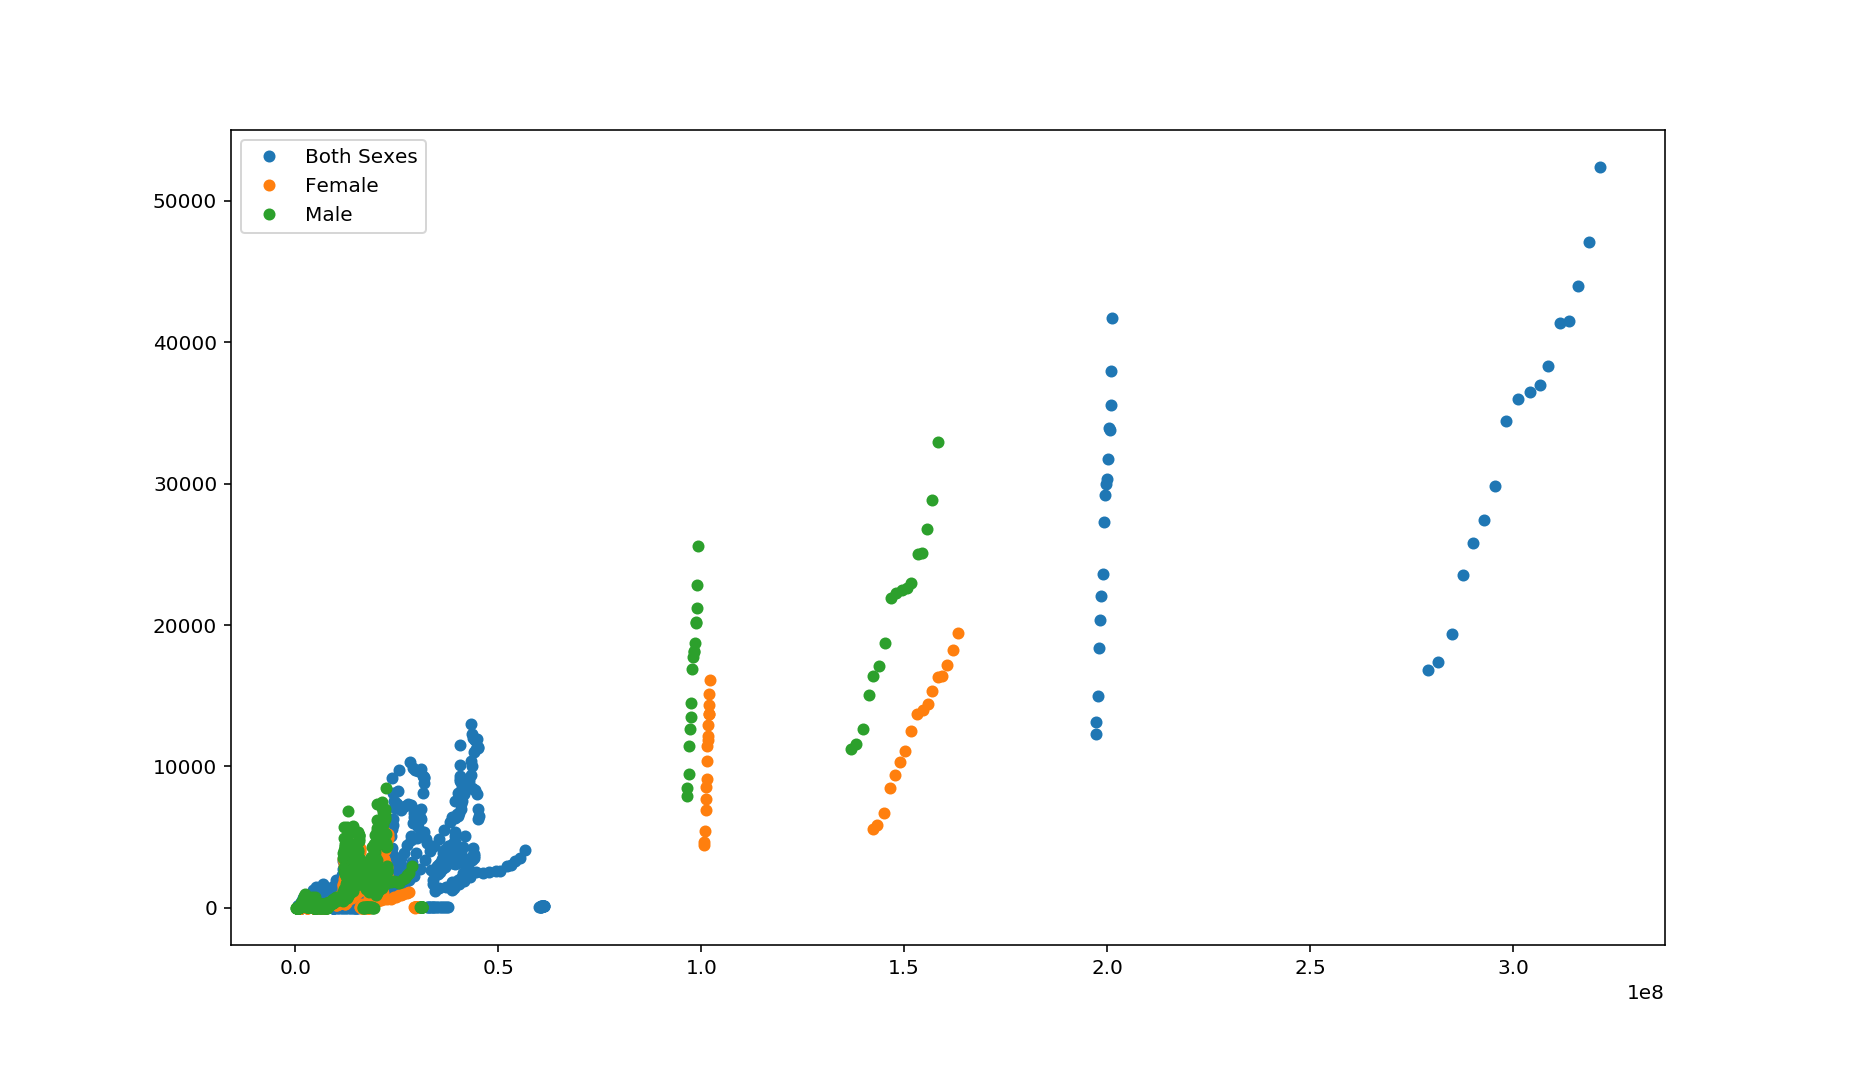

In [85]:
groups = df.groupby('Sex')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['Population'], group['Deaths'], marker='o', linestyle='', ms=5, label=name)
ax.legend()

plt.show()

<IPython.core.display.Javascript object>


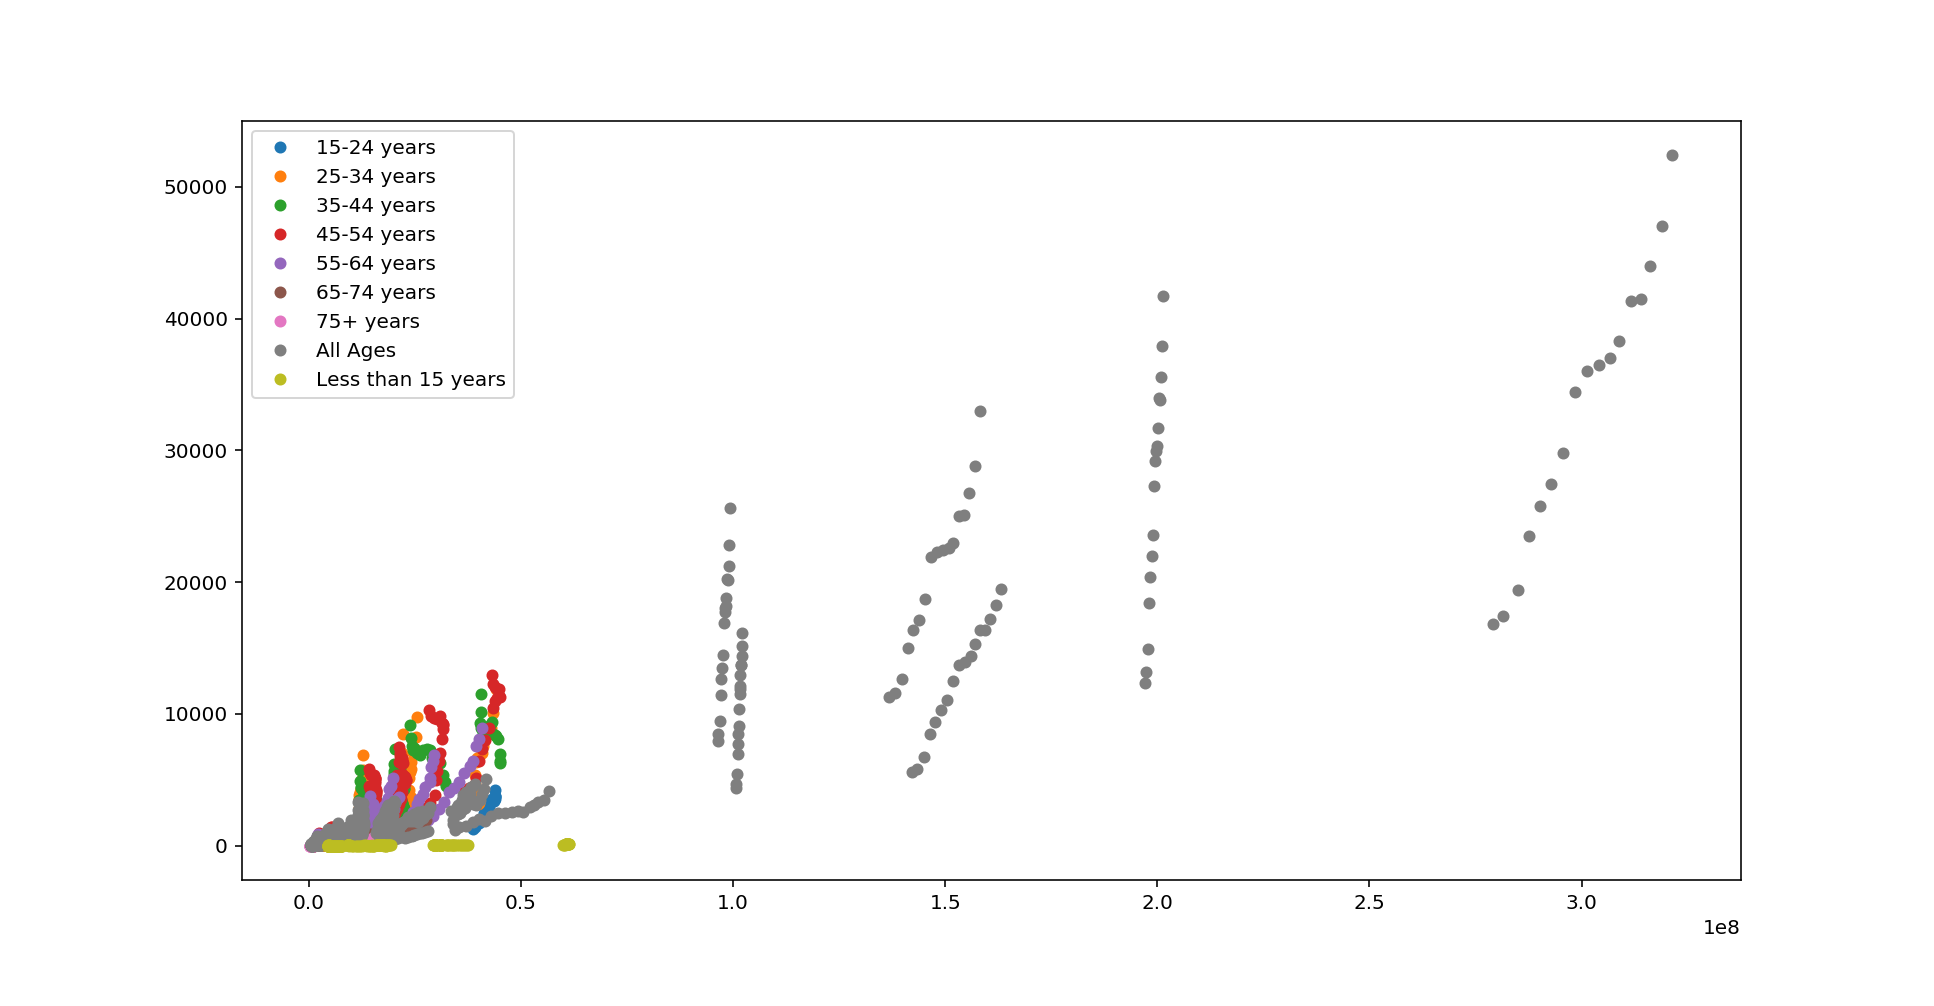

In [87]:
groups = df.groupby('Age')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['Population'], group['Deaths'], marker='o', linestyle='', ms=5, label=name)
ax.legend()

plt.show()

<IPython.core.display.Javascript object>


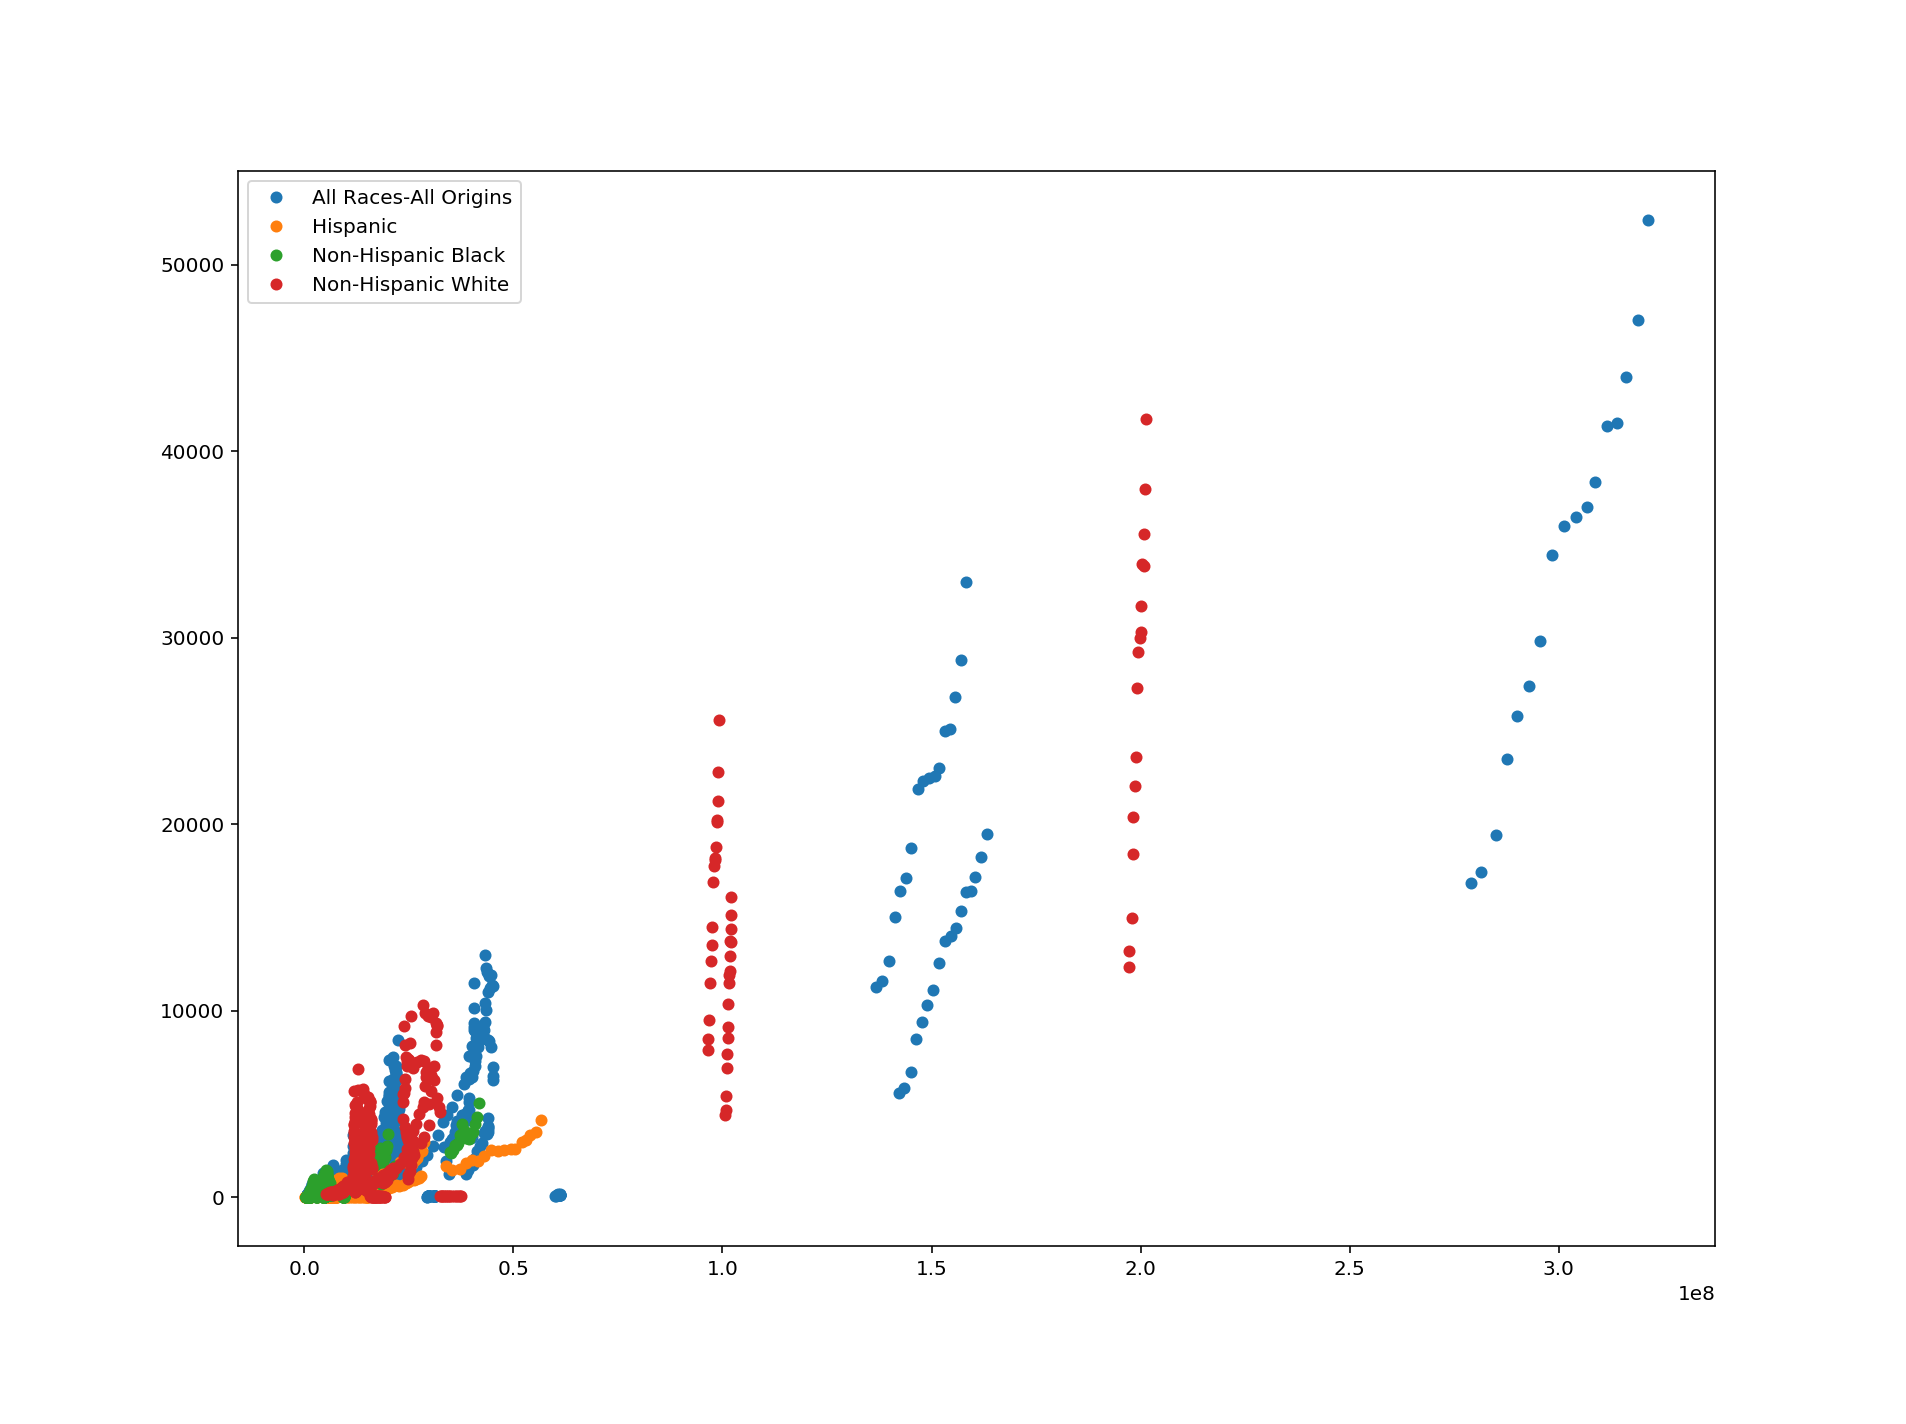

In [88]:
groups = df.groupby('Race and Hispanic Origin')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['Population'], group['Deaths'], marker='o', linestyle='', ms=5, label=name)
ax.legend()

plt.show()

<IPython.core.display.Javascript object>


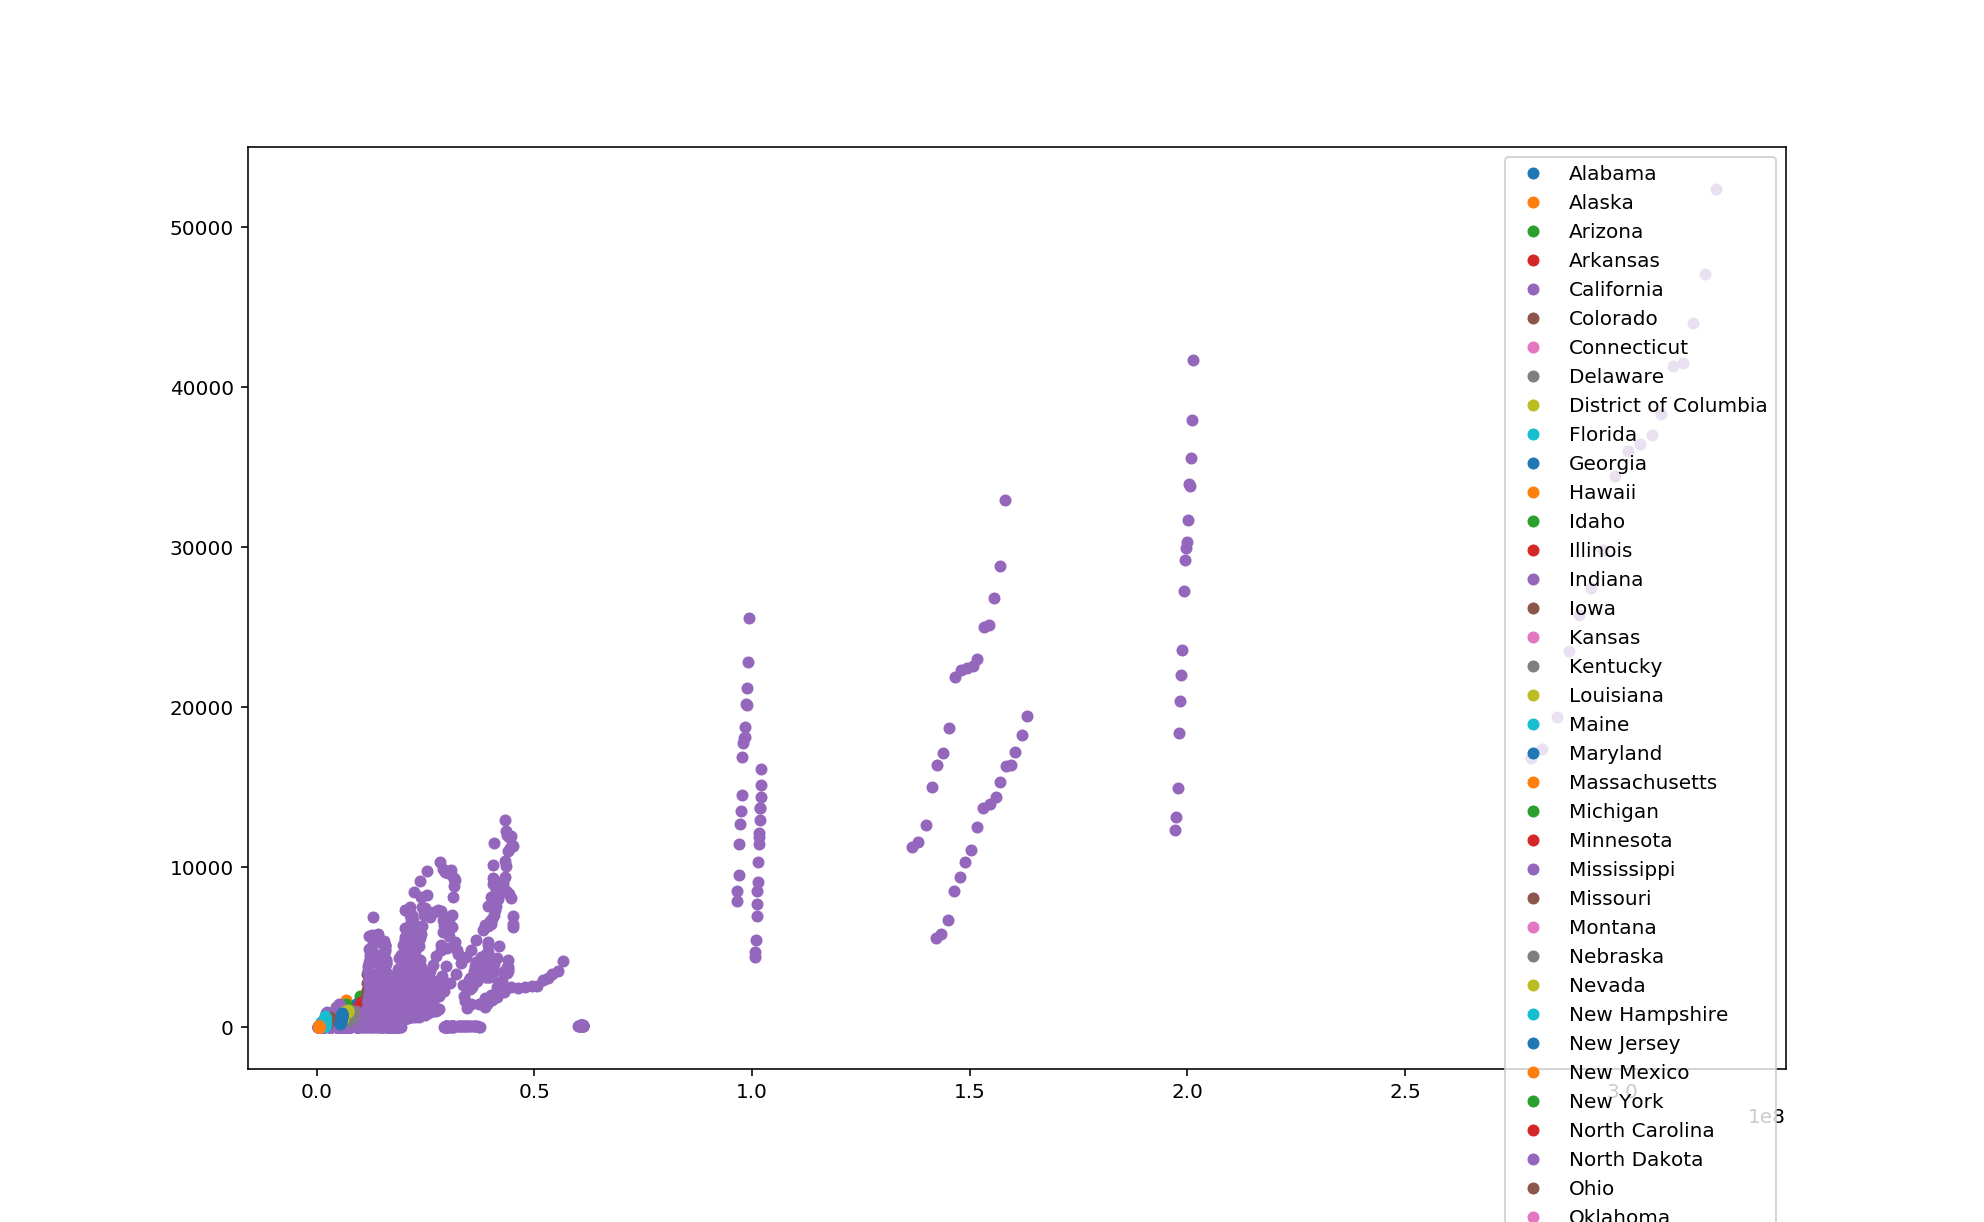

In [89]:
groups = df.groupby('State')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['Population'], group['Deaths'], marker='o', linestyle='', ms=5, label=name)
ax.legend()

plt.show()

In [91]:
df['State'].value_counts()

United States           1836
Maryland                  17
Illinois                  17
Mississippi               17
Alaska                    17
Montana                   17
Utah                      17
Tennessee                 17
New Mexico                17
Oregon                    17
Wyoming                   17
New Jersey                17
Nevada                    17
Alabama                   17
Texas                     17
Nebraska                  17
North Carolina            17
Maine                     17
Virginia                  17
Washington                17
Idaho                     17
Massachusetts             17
Rhode Island              17
Georgia                   17
Florida                   17
Oklahoma                  17
Pennsylvania              17
New York                  17
Missouri                  17
Vermont                   17
South Carolina            17
District of Columbia      17
West Virginia             17
Wisconsin                 17
Kentucky      

In [92]:
df['Sex'].value_counts()

Both Sexes    1479
Female         612
Male           612
Name: Sex, dtype: int64

In [93]:
df['Age'].value_counts()

All Ages              1071
Less than 15 years     204
35-44 years            204
55-64 years            204
75+ years              204
65-74 years            204
45-54 years            204
15-24 years            204
25-34 years            204
Name: Age, dtype: int64

In [94]:
df['Race and Hispanic Origin'].value_counts()

All Races-All Origins    1326
Hispanic                  459
Non-Hispanic Black        459
Non-Hispanic White        459
Name: Race and Hispanic Origin, dtype: int64